<a href="https://colab.research.google.com/github/ShuqairABD/YOLOv8s-seg-Roboflow/blob/main/%D0%9E%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_YOLOv8s_seg_%D0%B4%D0%BB%D1%8F_%D1%81%D0%B5%D0%B3%D0%BC%D0%B5%D0%BD%D1%82%D0%B0%D1%86%D0%B8%D0%B8_%D0%BE%D0%B1%D1%8A%D0%B5%D0%BA%D1%82%D0%BE%D0%B2_%D0%BD%D0%B0_%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D0%BE%D0%B2%D0%B0%D1%82%D0%B5%D0%BB%D1%8C%D1%81%D0%BA%D0%BE%D0%BC_%D0%BD%D0%B0%D0%B1%D0%BE%D1%80%D0%B5_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_%2B_%D0%BE%D0%B1%D0%BE%D0%B1%D1%89%D0%B5%D0%BD%D0%B8%D0%B5_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# YOLOv8s-seg Instance Segmentation on a Custom Dataset







In [ ]:
!nvidia-smi

Tue Jan 30 19:29:12 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# Импорт библиотеки os
import os

# Получение текущего рабочего каталога и вывод его на экран
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8



In [ ]:
# Установка библиотеки Ultralytics
!pip install ultralytics==8.0.196

# Импорт модуля display из библиотеки IPython
from IPython import display

# Очистка вывода в блокноте
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/166.8 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
# Изменение текущей директории на HOME
%cd {HOME}
# Запуск команды YOLO для выполнения сегментации на изображении '1_result.png'
!yolo task=segment mode=predict model=yolov8s-seg.pt conf=0.25 source='/content/1_result.png' save=true

/content
100% 22.8M/22.8M [00:00<00:00, 164MB/s]
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11810560 parameters, 0 gradients, 42.6 GFLOPs

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 445, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 242, in predict
    return self.predictor.predict_cli(source=source) if is_cli else self.predictor(source=source, stream=stream)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/predictor.py", line 205, in predict_cli
    for _ in gen:  # running CLI inference without accumulating any outputs (do not modify)
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py", line 35,

/content


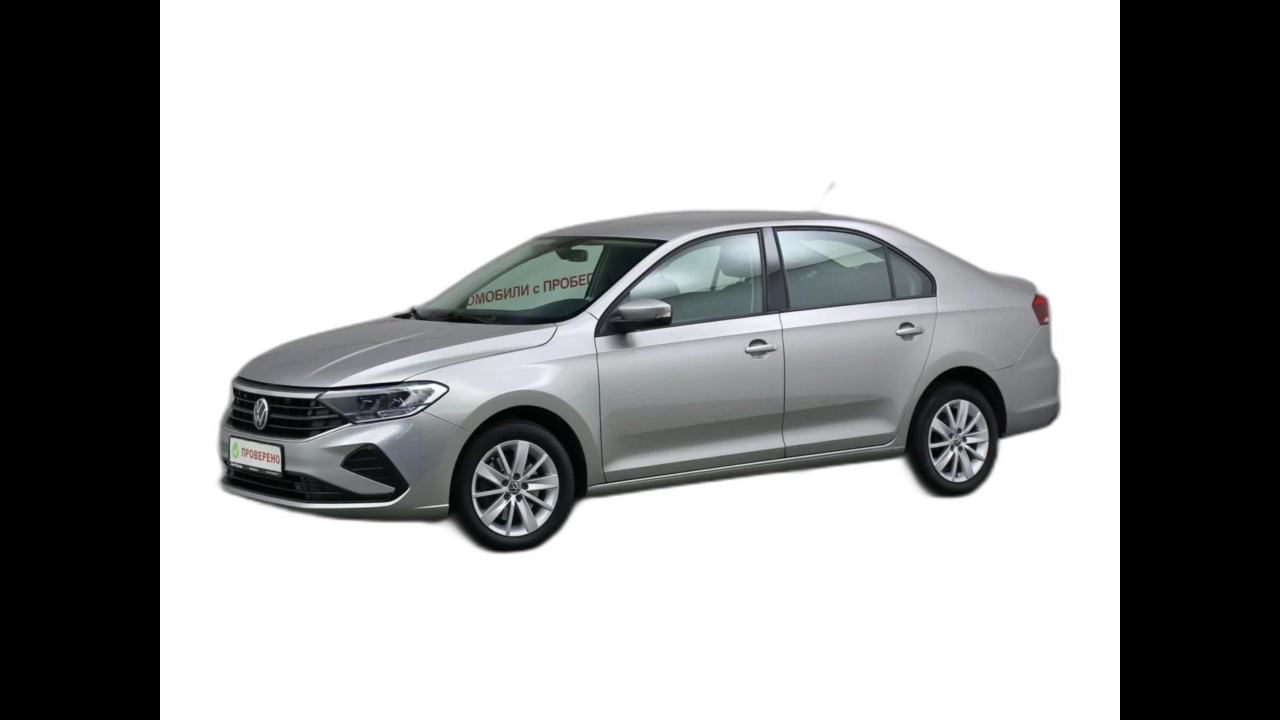

In [ ]:
%cd {HOME}
Image(filename='/content/1_result.png', height=600)

In [ ]:
model = YOLO(f'{HOME}/yolov8s-seg.pt')

# Применение модели для предсказания на изображении '/content/runs/segment/predict/1_result.png' с порогом уверенности 0.25
results = model.predict(source='/content/runs/segment/predict/1_result.png', conf=0.25)


image 1/1 /content/runs/segment/predict/1_result.png: 384x640 1 car, 132.6ms
Speed: 2.4ms preprocess, 132.6ms inference, 506.4ms postprocess per image at shape (1, 3, 384, 640)


/content


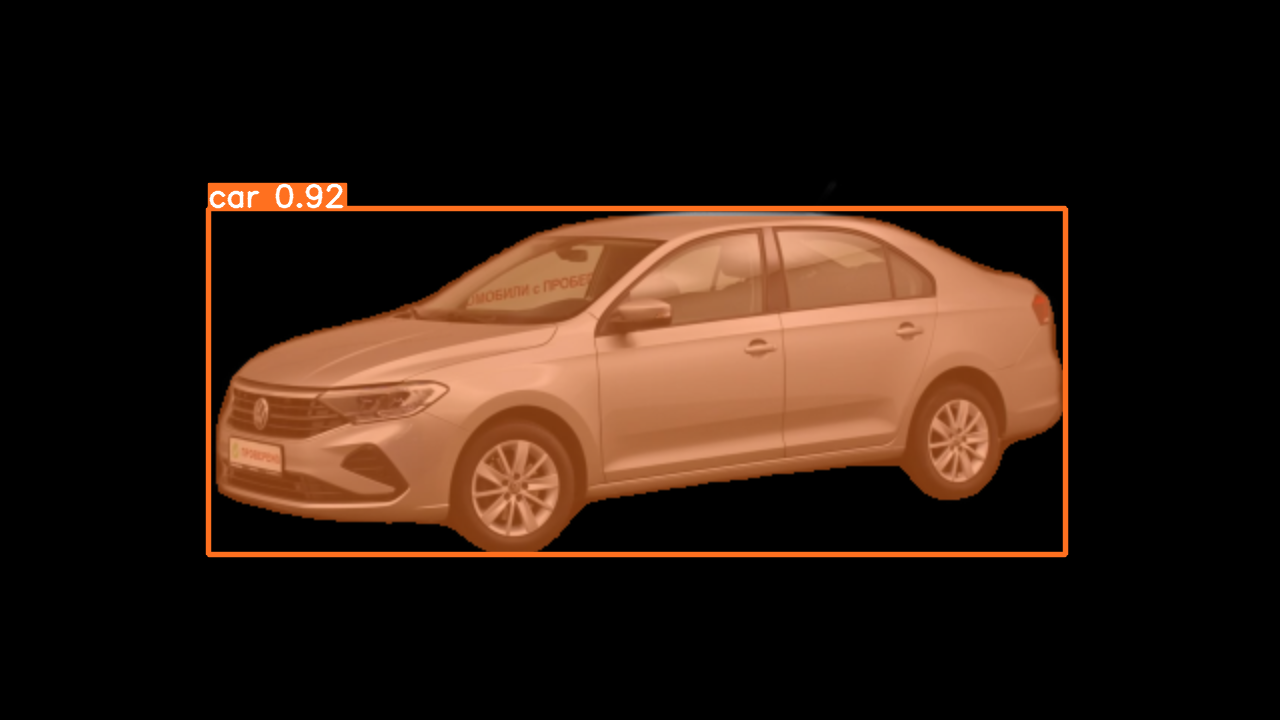

In [ ]:
# Переход в домашнюю директорию
%cd {HOME}

# Отображение изображения с результатами, сохраненными в папке 'predict'
Image(filename='/content/runs/segment/predict/1_result.png', height=600)

# RoboFlow

In [ ]:
# Создание директории для набора данных
!mkdir {HOME}/datasets

# Переход в директорию с набором данных
%cd {HOME}/datasets

# Установка библиотеки roboflow
!pip install roboflow --quiet

from roboflow import Roboflow
!pip install roboflow


# Инициализация объекта Roboflow с использованием API-ключа
rf = Roboflow(api_key="ddJX0UP9G8sFYbMJboCM")
project = rf.workspace("abdalla-shuqair-a6pml").project("car-parts-segmentation-l4dqz")
dataset = project.version(8).download("yolov8")


/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.0/70.0 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
loading Roboflow


Extracting Dataset Version Zip to Car-Parts-Segmentation-8 in yolov8:: 100%|██████████| 274/274 [00:00<00:00, 4565.00it/s]


## Custom Training

In [ ]:
# Переход в рабочую директорию
%cd {HOME}

# Запуск обучения модели YOLOv8 для задачи сегментации
!yolo task=segment mode=train model=yolov8s-seg.pt data={dataset.location}/data.yaml epochs=50 imgsz=640

/content
New https://pypi.org/project/ultralytics/8.1.7 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/content/datasets/Car-Parts-Segmentation-8/data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=No

In [ ]:
# Отображение содержимого директории с результатами обучения модели
!ls {HOME}/runs/segment/train/

args.yaml					    labels.jpg	      train_batch280.jpg
BoxF1_curve.png					    MaskF1_curve.png  train_batch281.jpg
BoxP_curve.png					    MaskP_curve.png   train_batch282.jpg
BoxPR_curve.png					    MaskPR_curve.png  train_batch2.jpg
BoxR_curve.png					    MaskR_curve.png   val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv       val_batch0_pred.jpg
confusion_matrix.png				    results.png       weights
events.out.tfevents.1706525948.cb09ed306cb3.1206.0  train_batch0.jpg
labels_correlogram.jpg				    train_batch1.jpg


/content


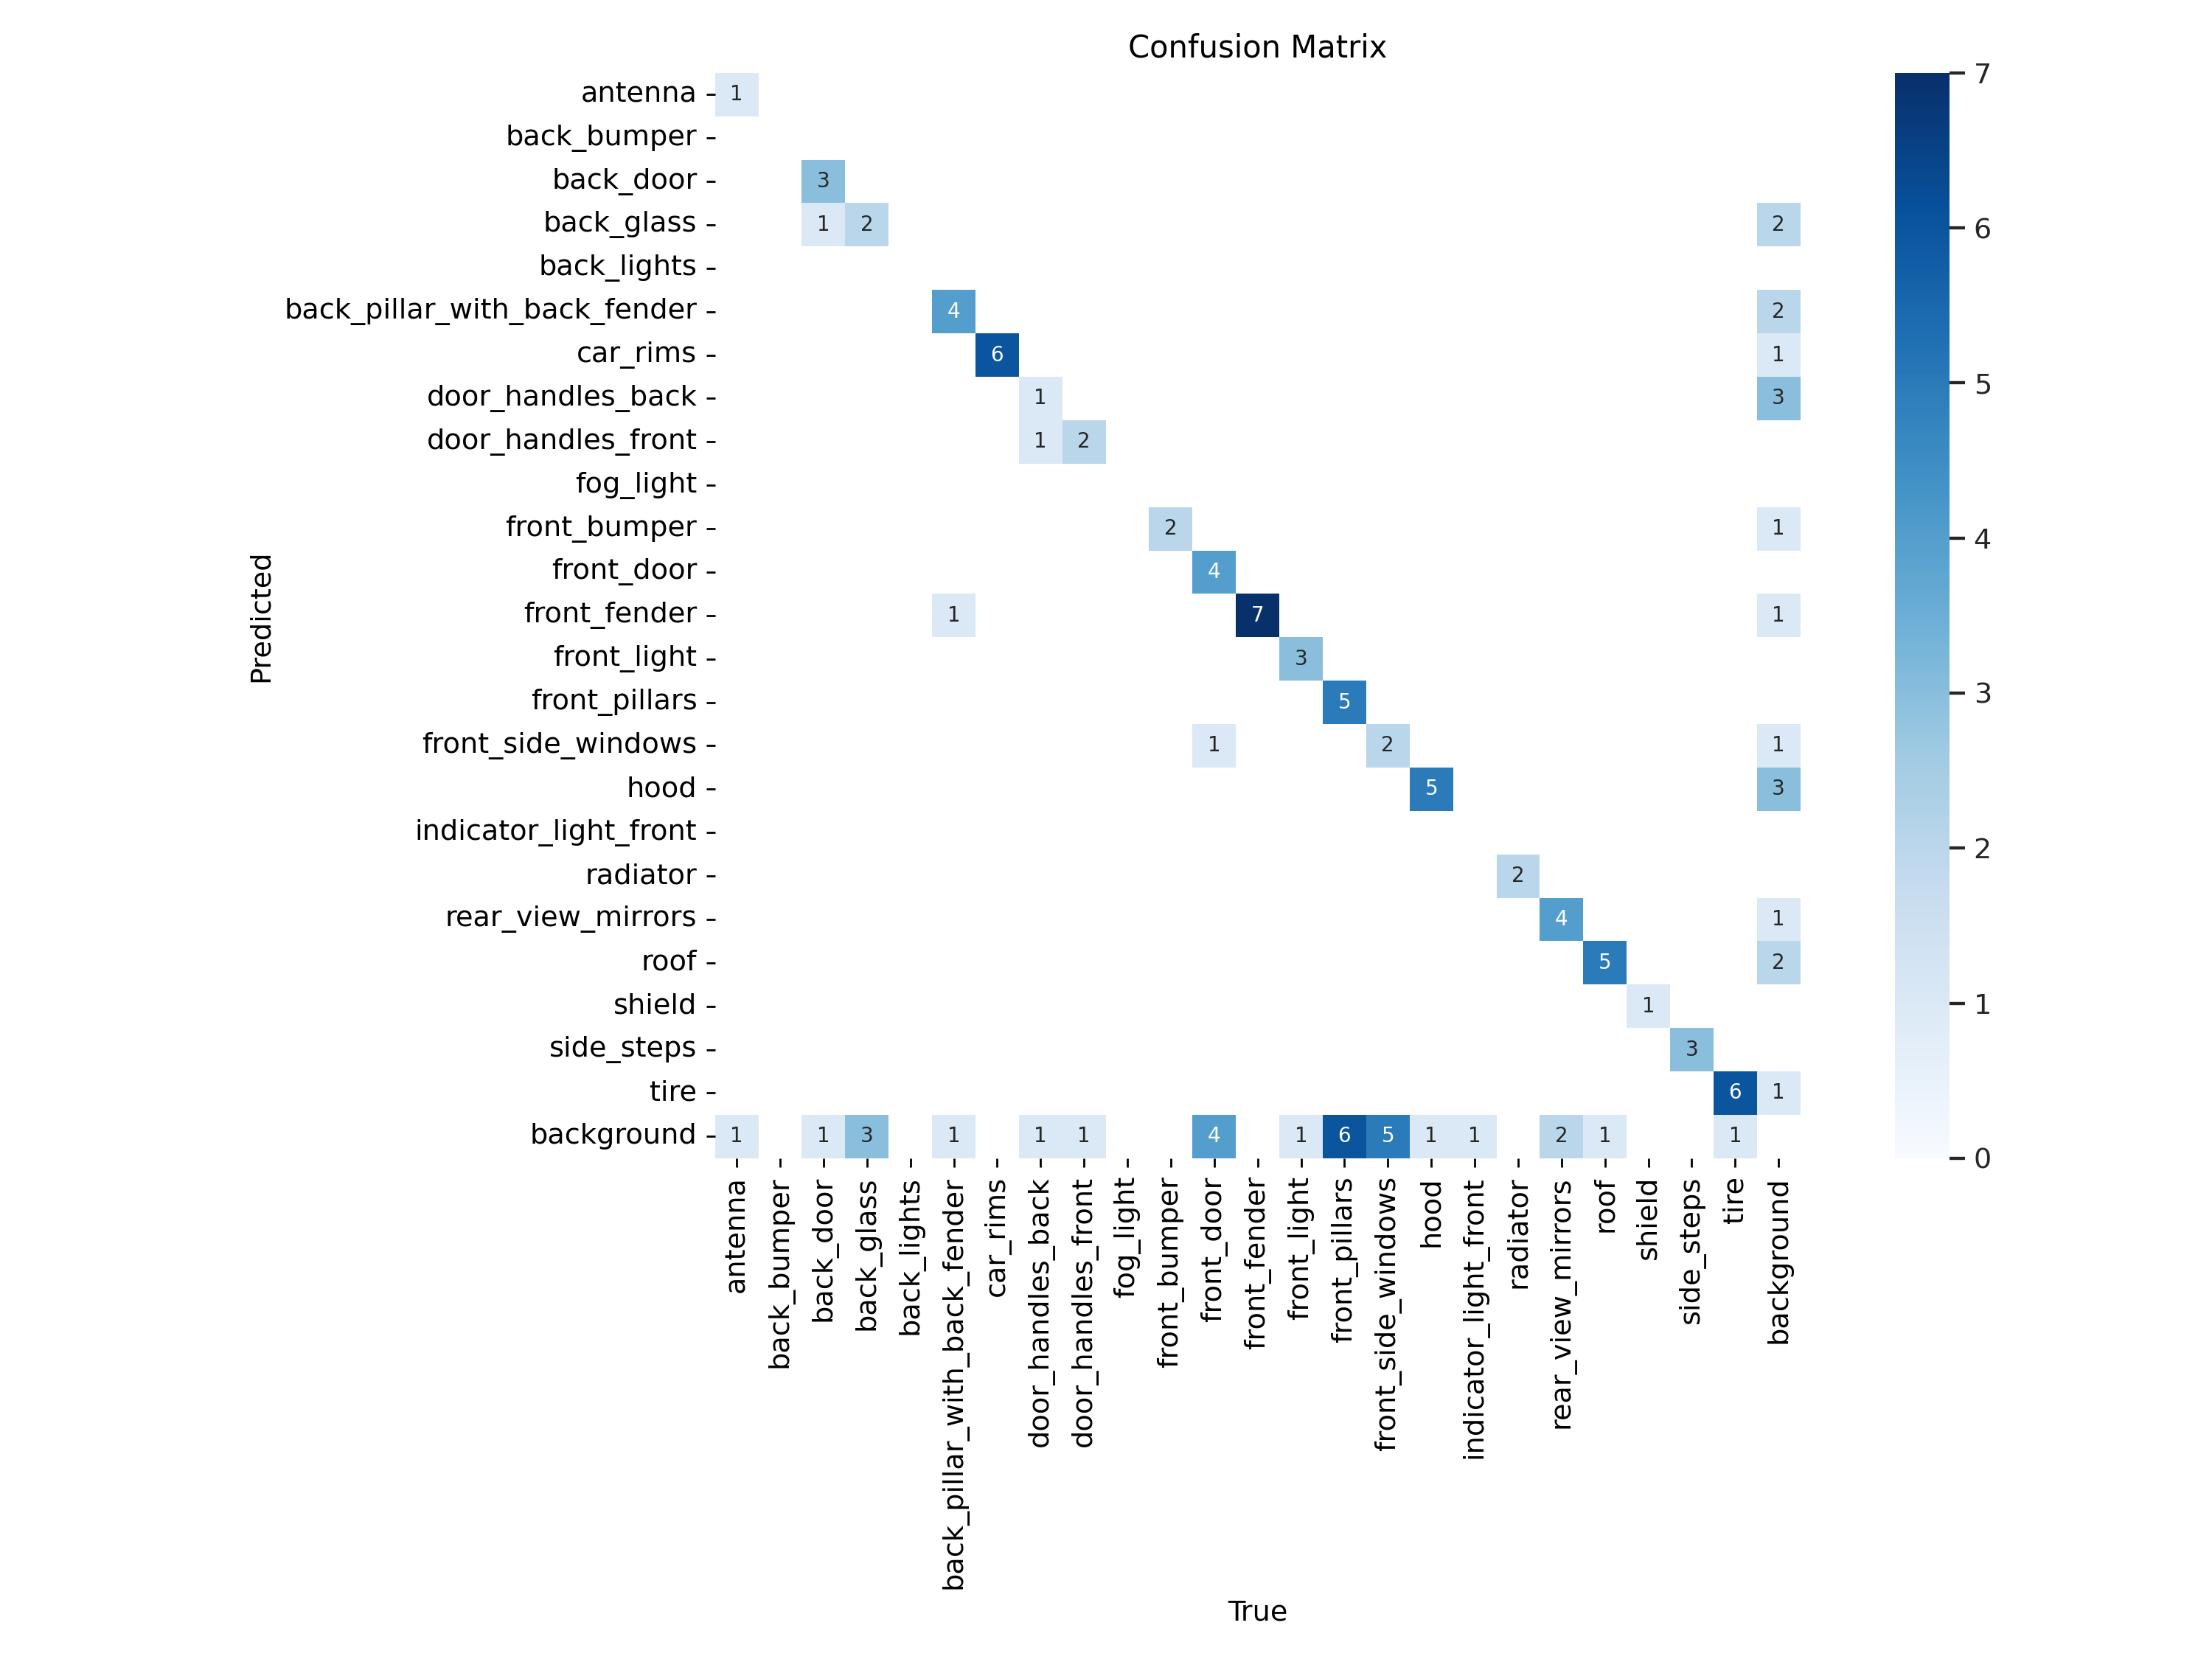

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/confusion_matrix.png', width=900)

/content


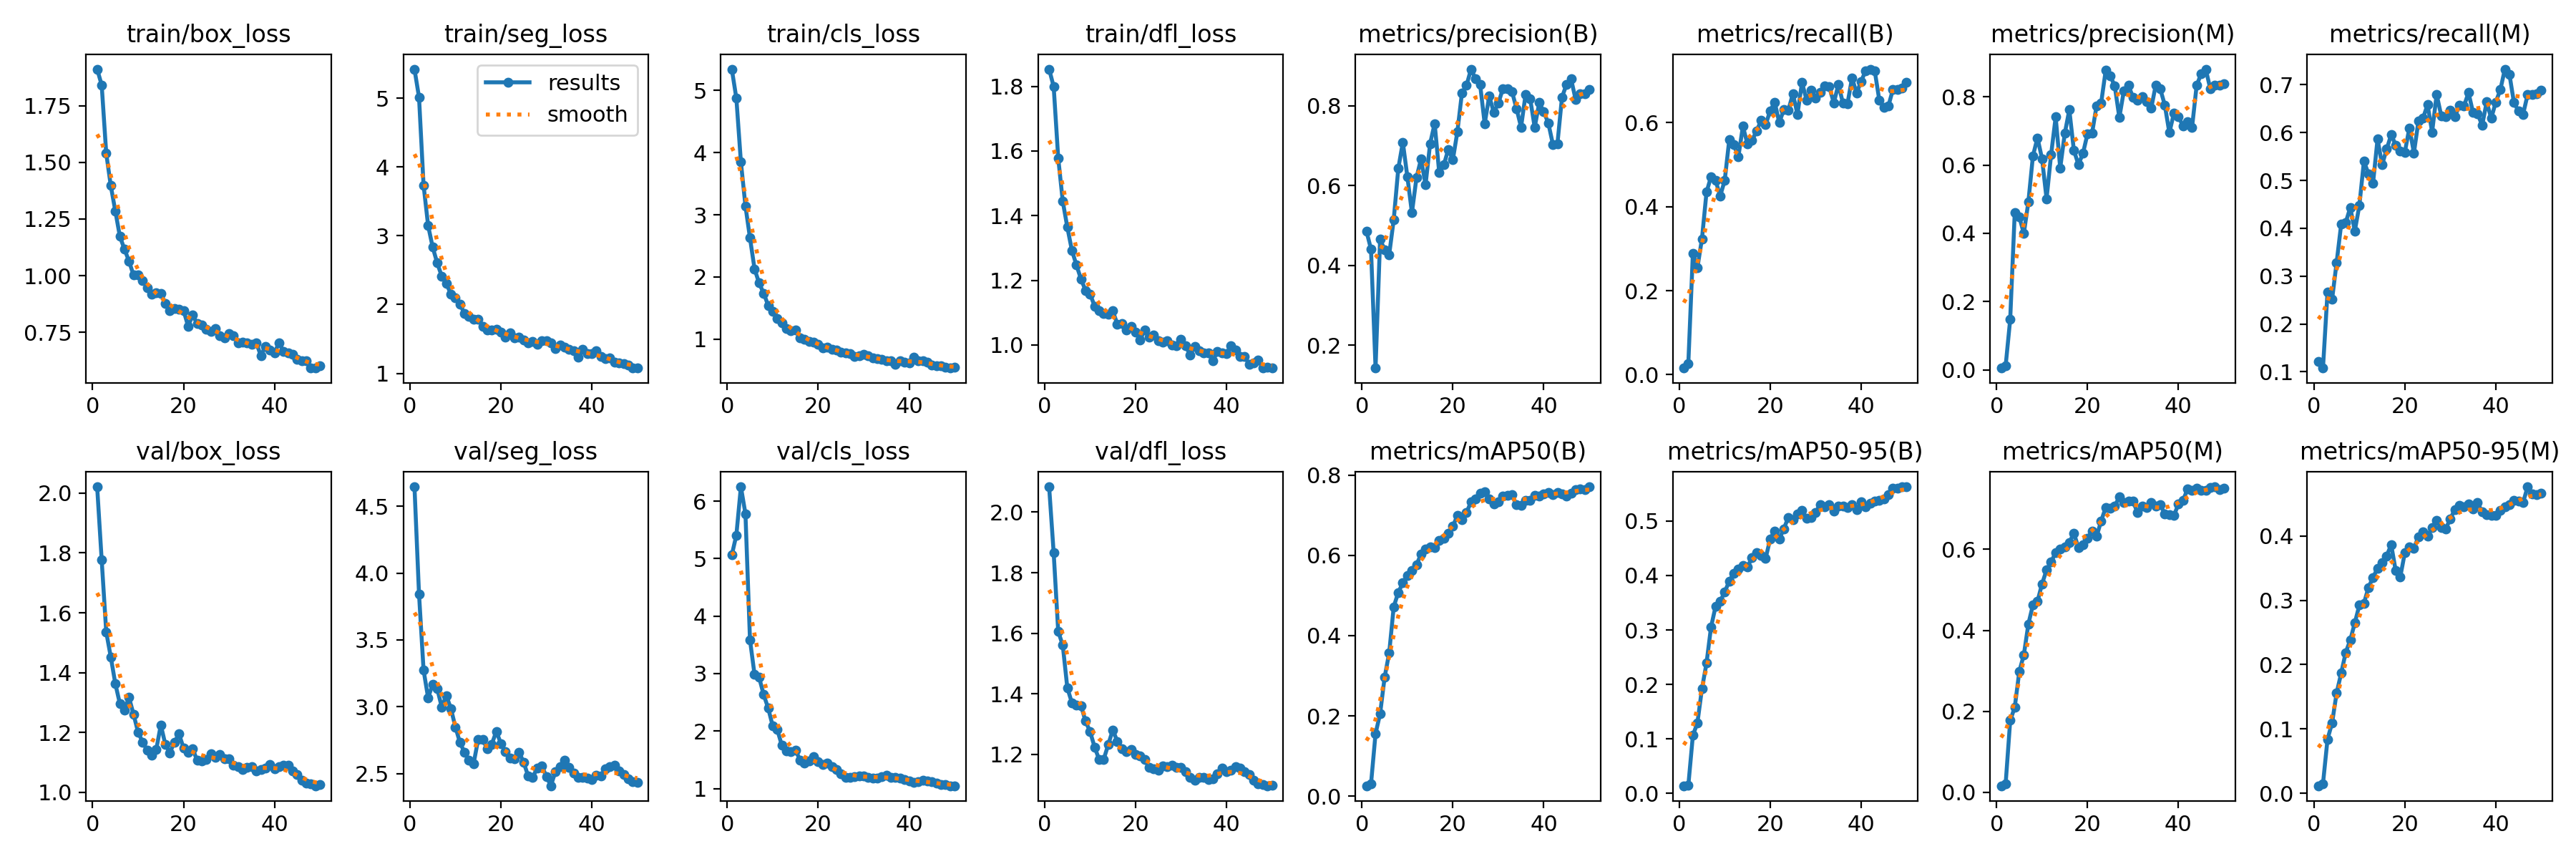

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/results.png', width=900)

/content


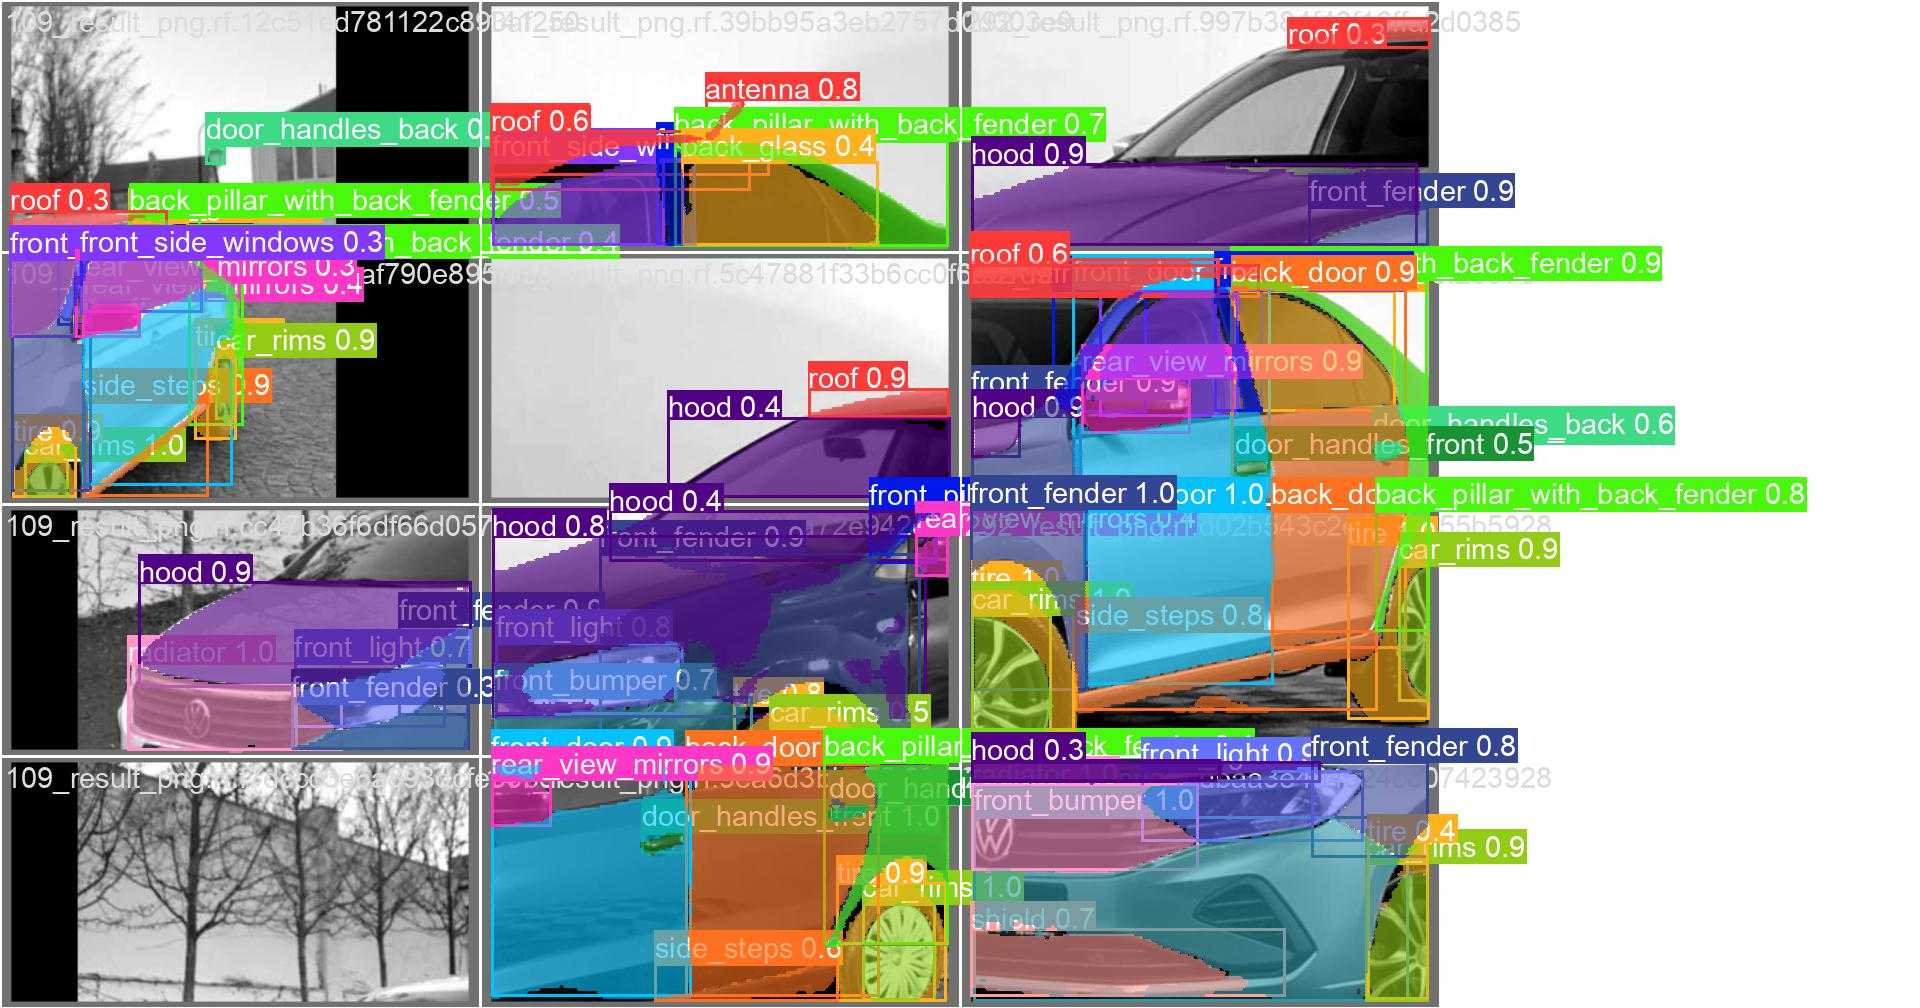

In [ ]:
%cd {HOME}

# Отображение изображения с предсказанными результатами на валидационном батче модели YOLOv8
Image(filename=f'{HOME}/runs/segment/train/val_batch0_pred.jpg', width=1000)

## Validate Custom Model

In [ ]:
# Запуск валидации модели YOLOv8 на валидационном наборе данных с использованием лучших весов
# для сохраненной модели в папке с весами "best.pt".

%cd {HOME}
!yolo task=segment mode=val model={HOME}/runs/segment/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11788888 parameters, 0 gradients, 42.5 GFLOPs
val: Scanning /content/datasets/Car-Parts-Segmentation-8/valid/labels.cache... 12 images, 0 backgrounds, 0 corrupt: 100% 12/12 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  1.07it/s]
                   all         12        102      0.816       0.68      0.764      0.558      0.821       0.68      0.752      0.468
               antenna         12          2      0.723        0.5      0.828      0.468      0.725        0.5      0.828      0.257
             back_door         12          5      0.853        0.6      0.618      0.589      0.853        0.6      0.597      0.557
            back_glass         12          5      0.748        0.6      0.795      0.584      0.799      

## Test the Model

In [ ]:
%cd {HOME}

# Запуск предсказания сегментации на тестовом наборе данных с использованием лучших весов
!yolo task=segment mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=true

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11788888 parameters, 0 gradients, 42.5 GFLOPs

image 1/11 /content/datasets/Car-Parts-Segmentation-8/test/images/123_result_png.rf.32cb0fb470b5ae58fd137ea19d14bad8.jpg: 352x640 1 fog_light, 1 front_bumper, 1 front_light, 1 shield, 144.4ms
image 2/11 /content/datasets/Car-Parts-Segmentation-8/test/images/123_result_png.rf.623f185750272bc5bf2cd76c86b55f4d.jpg: 352x640 1 front_light, 1 hood, 1 radiator, 13.4ms
image 3/11 /content/datasets/Car-Parts-Segmentation-8/test/images/123_result_png.rf.a7f0ca3fcd3024be28eb23c17519f6df.jpg: 352x640 1 back_door, 2 car_rimss, 1 fog_light, 1 front_bumper, 1 front_fender, 1 front_light, 1 side_steps, 2 tires, 13.3ms
image 4/11 /content/datasets/Car-Parts-Segmentation-8/test/images/162_result_png.rf.1834333534899c8ac790c77e8430ce4c.jpg: 352x640 1 back_door, 1 back_pillar_with_back_fender, 1 car_rims, 1 front_door, 1 si

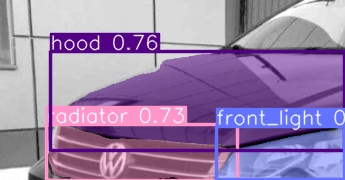

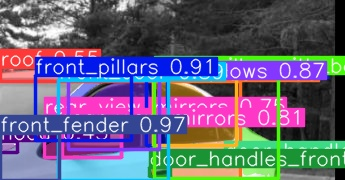

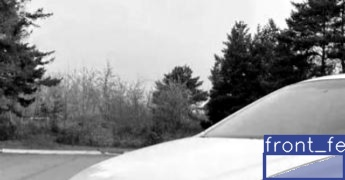

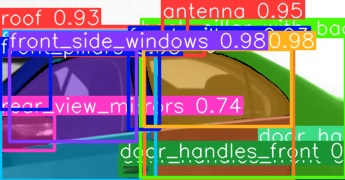

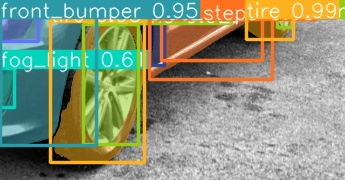

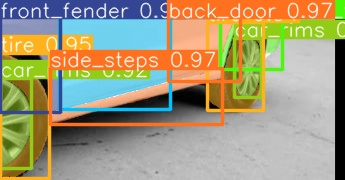

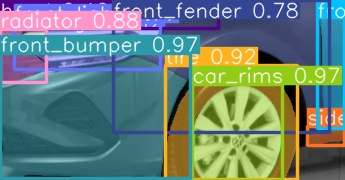

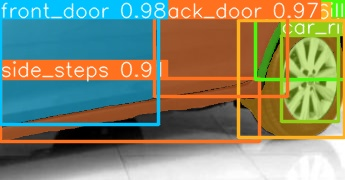

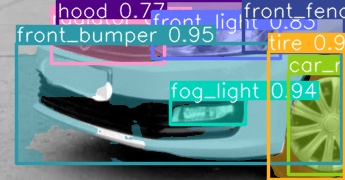

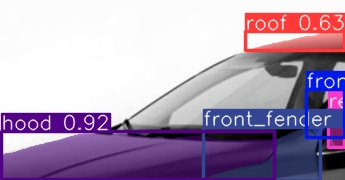

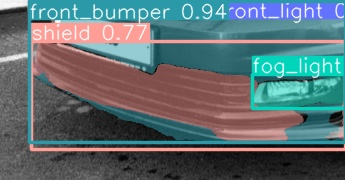

In [ ]:
# Отображение результатов сегментации на нескольких изображениях из папки predict2
import glob
from IPython.display import Image, display

    # Отображение изображения с результатами сегментации
for image_path in glob.glob(f'{HOME}/runs/segment/predict2/*.jpg')[:11]:
      display(Image(filename=image_path, height=400))
      print("\n")

**conducting in any uploaded photo**

In [ ]:
# Импорт необходимых библиотек

from google.colab import files
from IPython.display import Image as IPImage, display
import os

# Функция для загрузки изображения
def upload_image():
    uploaded = files.upload()
    return list(uploaded.keys())[0]  # Get the name of the uploaded file

# Загрузка изображения
image_path = upload_image()

# Замена пробелов подчеркиваниями в имени файла
image_path_no_spaces = image_path.replace(" ", "_")

# Запуск модели YOLO на загруженном изображении
!yolo task=segment mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.25 source={image_path_no_spaces} save=true

# Отображение результата, если он доступен
result_image_path = f'{HOME}/runs/segment/predict7/{os.path.basename(image_path_no_spaces)}'
if os.path.exists(result_image_path):
    display(IPImage(filename=result_image_path, width=400))
else:
    print("Result saved. Please check the prediction directory.")


In [ ]:
# Функция для ввода пути к фотографии и ее отображения вручную
def display_image_manually():
    photo_path = input("Enter the path of the photo: ")
    display(IPImage(filename=photo_path, width=800))

# Вызов функции
display_image_manually()

## Save weights:

 `/runs/detect/train/weights/best.pt`



In [ ]:
#project.version(dataset.version).deploy(model_type="yolov8-seg", model_path=f"{HOME}/runs/segment/train/")